<a href="https://colab.research.google.com/github/LeVuPhuoc/KT_21-5/blob/main/Classification_4_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/AI')


In [4]:
# load image
path_dir = os.path.join(os.getcwd(), 'image')
path_dir = sorted(glob.glob(path_dir + '/*'))

angry = glob.glob(path_dir[0] + '/*')
happy = glob.glob(path_dir[1] + '/*')
sad = glob.glob(path_dir[2] + '/*')
suprise = glob.glob(path_dir[3] + '/*')

In [5]:
img_cnt = len(angry) + len(happy) + len(sad) + len(suprise)
print(img_cnt)

class_names = ['angry', 'happy', 'sad', 'surprise']
num_classes = len(class_names)
print(class_names)

79
['angry', 'happy', 'sad', 'surprise']


In [6]:
def load_image(path, img_size=(150, 150)):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img

In [7]:
def load_images(path_dir):
    images = []
    labels = []

    path_dir = sorted(glob.glob(path_dir + '/*'))
    print(path_dir)
    for paths in path_dir:
        paths = sorted(glob.glob(paths + '/*'))
        for path in paths:
            img = load_image(path)
            images.append(img)
            labels.append(class_names.index(os.path.basename(os.path.dirname(path))))
    return np.array(images), np.array(labels)

In [8]:
data_dir = os.path.join(os.getcwd(), 'image')
dataset = load_images(data_dir)

['/content/gdrive/MyDrive/Colab Notebooks/AI/image/angry', '/content/gdrive/MyDrive/Colab Notebooks/AI/image/happy', '/content/gdrive/MyDrive/Colab Notebooks/AI/image/sad', '/content/gdrive/MyDrive/Colab Notebooks/AI/image/surprise']


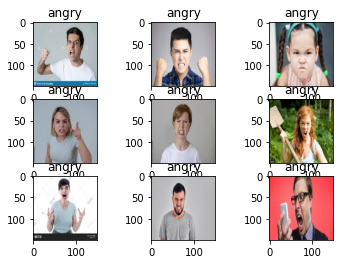

In [9]:
for i in range(9):
  # print(class_names[dataset[1][i]])
  plt.subplot(3, 3, i+1)
  plt.title(class_names[dataset[1][i]])
  plt.imshow(dataset[0][i])


In [10]:
print(dataset[0].shape)
print(dataset[1].shape)

(79, 150, 150, 3)
(79,)


In [11]:
# train test split
train_images, test_images, train_labels, test_labels = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(63, 150, 150, 3)
(16, 150, 150, 3)
(63,)
(16,)


In [12]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(63, 150, 150, 3)
(16, 150, 150, 3)
(63, 4)
(16, 4)


In [13]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 41, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [36]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential()


model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer =tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

history = model.fit(train_images, train_labels, batch_size = 128, epochs = 50, validation_split = 0.2)
model.save('classification_4_emotion')


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_96 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_98 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [42]:
print("test loss, test acc:", model.evaluate(test_images, test_labels))

1/1 [==============================] - 0s 422ms/step - loss: 15.3113 - acc: 0.1250
test loss, test acc: [15.311325073242188, 0.125]


Text(0.5, 1.0, 'Predict: surprise')

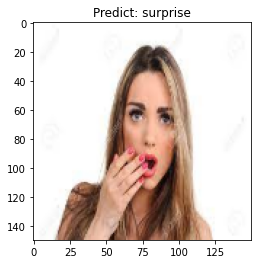

In [41]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/AI/image/surprise/surprised11.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: sad')

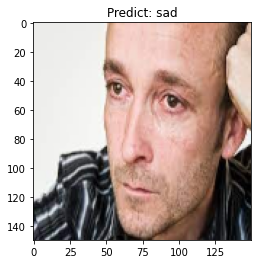

In [43]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/AI/image/sad/sad9.jpg')
plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: angry')

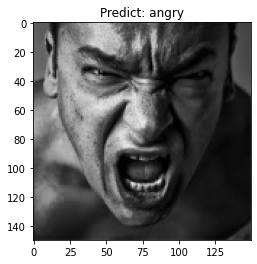

In [48]:
# from tensorflow.keras.preprocessing.image import load_img
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/AI/image/angry/angry17.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: happy')

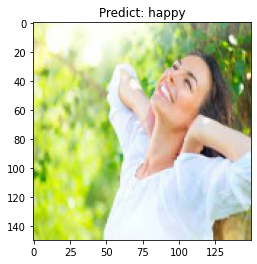

In [49]:
# from tensorflow.keras.preprocessing.image import load_img
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/AI/image/happy/happy4.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))